In [1]:
#Some Imports
import igraph as ig;
import matplotlib.pyplot as plt
import numpy as np;
import pandas as pd;
from pylab import *
#keeps the plots in the notebook
%matplotlib inline
#random number generator
import random;
random.seed(100);  #setting the random seed

<font size=5><B><i>Example: Generating igraph from Numpy array adjacency matrix</B></i></font>

In [2]:

node_names = ['A', 'B', 'C']
a = pd.DataFrame([[1,2,3],[3,1,1],[4,0,2]], index=node_names, columns=node_names)
A = a.values

In [3]:
graph = ig.Graph.Adjacency((a.values > 0).tolist())
graph.es['weight'] = A[A.nonzero()]
graph.vs['label'] = node_names

layout = graph.layout("kamada_kawai")
print(layout)
ig.plot(graph, layout = layout, bbox = (300,300), margin=20)


AttributeError: 'module' object has no attribute 'Graph'

<font size=8> Generating Community Graph</font> 
<font size=3><p> Strategy is to first layout an membership matrix,then use a random number generator to create an adjacency matrix, finally turn the adjacency matrix into a graph</p></font> 

<font size=6> Trivial Communities </font>

In [4]:
membershipMatrix = np.array([
[1,0,0],    #user1
[1,0,0],    #user2
[1,0,0],    #user3
[1,0,0],    #user4
#[1,0,0],    #user5
[0,1,0],    #user6
[0,1,0],    #user7
[0,1,0],    #user8
[0,1,0],    #user9
#[0,1,0],    #user10
[0,0,1],    #user11
[0,0,1],    #user12
[0,0,1],    #user13
[0,0,1]     #user14
#[0,0,1],    #user15
])

In [5]:
node_names= ['a','b','c','d','e','f', 'g', 'h', 'i', 'j', 'k', 'l']
#constructing the adjacency matrix... here, we assume that any connection that could exist P(i,j) != 0, does exist
trivialAdj = np.inner(membershipMatrix, membershipMatrix)

#we don't want self connections... so lets set the diagonal terms to zero
np.fill_diagonal(trivialAdj,0)
df = pd.DataFrame(trivialAdj, index=node_names, columns=node_names)
trivialAdj = df.values

tightCommunities = ig.Graph.Adjacency((trivialAdj > 0).tolist())
tightCommunities.es['weight'] = trivialAdj[trivialAdj.nonzero()]
tightCommunities.vs['label'] = node_names

print(trivialAdj)
print(tightCommunities)


AttributeError: 'module' object has no attribute 'Graph'

In [6]:
tightLayout = tightCommunities.layout("Fruchterman_Reingold")
ig.plot(tightCommunities, layout = tightLayout, bbox = (300,300), margin=5)

NameError: name 'tightCommunities' is not defined

<font size=6>Non-trivial Communities</font>

In [60]:
membershipMatrix = np.array([
[10,0,0],    #user1
[10,0,0],    #user2
[10,0,0],    #user3
[10,1,1],    #user4
#[1,0,0],    #user5
[0,10,0],    #user6
[0,10,0],    #user7
[0,10,0],    #user8
[0,10,0],    #user9
#[0,1,0],    #user10
[0,0,10],    #user11
[0,0,10],    #user12
[0,0,10],    #user13
[0,0,10]     #user14
#[0,0,1],    #user15
])

In [65]:
node_names= ['a','b','c','d','e','f', 'g', 'h', 'i', 'j', 'k', 'l']
#reduction factor, to transform our intuitive membership values (between 0-10) to probabilities.   That is even though two people are
#only loosely connected to a community (say 3 each), the probability of connection merely due to that shared community would be
#1-exp(-9) = 99.95%
connectionModifier = 2.3e-2

#probability that two nodes are connected... P(i,j) = 1 - exp(connectionStrengths[i,j])
connectionStrengths = connectionModifier * np.inner(membershipMatrix, membershipMatrix)
probabiliyOfConnection = 1- np.exp(-connectionStrengths)

#zeroing the diagonal elements
np.fill_diagonal(probabiliyOfConnection, 0)
print(probabiliyOfConnection)


[[ 0.          0.89974116  0.89974116  0.89974116  0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.89974116  0.          0.89974116  0.89974116  0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.89974116  0.89974116  0.          0.89974116  0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.89974116  0.89974116  0.89974116  0.          0.2054664   0.2054664
   0.2054664   0.2054664   0.2054664   0.2054664   0.2054664   0.2054664 ]
 [ 0.          0.          0.          0.2054664   0.          0.89974116
   0.89974116  0.89974116  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.2054664   0.89974116  0.
   0.89974116  0.89974116  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.2054664   0.89974116  0.89974116
   0.          0.89974116  0.          0.          0.          0.

In [66]:
#probabilityOfConnection contains the probability that any two nodes are connected, given our membership matrix
#convert this into an actual graph
dim=probabiliyOfConnection.shape

#a matrix of random numbers between 0-1;
#rand(N,M) will create an NxM array of random numbers 
randomProbability = np.random.rand(dim[0], dim[1])

adjacencyMatrix = probabiliyOfConnection > randomProbability
print(adjacencyMatrix)

[[False  True  True  True False False False False False False False False]
 [False False  True  True False False False False False False False False]
 [ True  True False  True False False False False False False False False]
 [ True  True  True False False  True False False False False  True False]
 [False False False False False  True  True  True False False False False]
 [False False False False  True False  True  True False False False False]
 [False False False  True  True  True False  True False False False False]
 [False False False  True  True  True  True False False False False False]
 [False False False False False False False False False  True  True  True]
 [False False False  True False False False False  True False  True  True]
 [False False False False False False False False  True  True False  True]
 [False False False False False False False False  True  True  True False]]


In [67]:
#turning the adjacency matrix into a graph
communityGraph = ig.Graph.Adjacency(adjacencyMatrix.tolist())
communityGraph.vs['labels'] = node_names
communityGraph.es['weight'] = adjacencyMatrix[adjacencyMatrix.nonzero()]
print(communityGraph)

IGRAPH D-W- 12 40 --
+ attr: labels (v), weight (e)
+ edges:
 0 ->  1  2  3          4 ->  5  6  7          8 ->  9 10 11
 1 ->  2  3             5 ->  4  6  7          9 ->  3  8 10 11
 2 ->  0  1  3          6 ->  3  4  5  7      10 ->  8  9 11
 3 ->  0  1  2  5 10    7 ->  3  4  5  6      11 ->  8  9 10


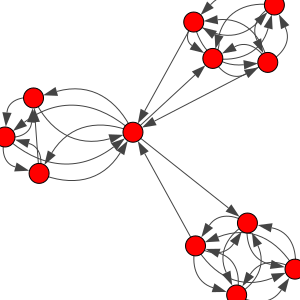

In [68]:
communityGraphLayout = communityGraph.layout("Fruchterman_Reingold")
ig.plot(communityGraph, layout = communityGraphLayout, bbox = (300,300), margin=5)

<font size=5>The generation method shown above is implemented in GraphLibrary.py (should be in the same directory that the python notebook is in)</font>